In [1]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 11.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=c6b3cfbd58425bb4757c781458596b0dbb8f3c9dc0dd01255392fd78ebad208e
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

In [3]:
import io

In [4]:
data=pd.read_csv("nfl_survival_analysis_data.csv")
data.head()

Draft_Yr  Rnd  Pick   Tm          Player Pos  Age    To  AP1  PB  ...  Rec  \
0      1967    1     1  BAL     Bubba Smith  DE   22  1976    1   2  ...    0   
1      1967    1     2  MIN     Clint Jones  RB   22  1973    0   0  ...   38   
2      1967    1     3  SFO  Steve Spurrier  QB   22  1976    0   0  ...    0   
3      1967    1     4  MIA      Bob Griese  QB   22  1980    2   8  ...    0   
4      1967    1     5  HOU  George Webster  LB   21  1976    3   3  ...    0   

   Rec_Yds  Rec_TD  Tkl  Def_Int   Sk       College  Player_ID  Retired  \
0        0       0  0.0        0  0.0  Michigan St.   SmitBu00        1   
1      431       0  0.0        0  0.0  Michigan St.   JoneCl00        1   
2        0       0  0.0        0  0.0       Florida   SpurSt00        1   
3        0       0  0.0        0  0.0        Purdue   GrieBo00        1   
4        0       0  0.0        5  0.0  Michigan St.   WebsGe00        1   

   Duration  
0        10  
1         7  
2        10  
3        14  
4        10  

[5 rows x 32 columns]

In [5]:
kmf = KaplanMeierFitter()

In [6]:
# The 1st arg accepts an array or pd.Series of individual survival times
# The 2nd arg accepts an array or pd.Series that indicates if the event
# interest (or death) occured.
kmf.fit(durations = data.Duration,
        event_observed = data.Retired)
kmf.event_table

removed  observed  censored  entrance  at_risk
event_at                                                
0.0          4597      4504        93     15592    15592
1.0          1310      1076       234         0    10995
2.0          1415      1176       239         0     9685
3.0          1183       952       231         0     8270
4.0          1126       942       184         0     7087
5.0           967       822       145         0     5961
6.0           915       782       133         0     4994
7.0           823       715       108         0     4079
8.0           743       667        76         0     3256
9.0           662       609        53         0     2513
10.0          580       523        57         0     1851
11.0          406       375        31         0     1271
12.0          313       291        22         0      865
13.0          198       184        14         0      552
14.0          149       146         3         0      354
15.0           88        85         3         0      205
16.0           52        49         3         0      117
17.0           33        33         0         0       65
18.0           11        11         0         0       32
19.0            5         5         0         0       21
20.0            8         8         0         0       16
21.0            5         5         0         0        8
22.0            1         1         0         0        3
23.0            1         1         0         0        2
26.0            1         1         0         0        1

In [7]:
# get the values for time = 0 from the survival table
event_at_0 = kmf.event_table.iloc[0, :]
# now calculate the survival probability for t = 0
surv_for_0 =  (event_at_0.at_risk - event_at_0.observed) / event_at_0.at_risk
surv_for_0


0.7111339148281169

In [8]:
# Calculate the survival probability for t = 1
event_at_1 = kmf.event_table.iloc[1, :]
surv_for_1 =  (event_at_1.at_risk - event_at_1.observed) / event_at_1.at_risk
surv_for_1

0.902137335152342

In [9]:
# Calculate the survival probability for t = 2
event_at_2 = kmf.event_table.iloc[2, :]
surv_for_2 =  (event_at_2.at_risk - event_at_2.observed) / event_at_2.at_risk
surv_for_2

0.8785751161590087

In [10]:
# The probability that an NFL player has a career longer than 2 years
surv_after_2 = surv_for_0 * surv_for_1 * surv_for_2
surv_after_2

0.5636414796488797

In [11]:
kmf.predict(2)

0.5636414796488793

In [12]:
kmf.predict([1,3,5,10])

1     0.641540
3     0.498758
5     0.372828
10    0.112089
Name: KM_estimate, dtype: float64

In [13]:
kmf.survival_function_

KM_estimate
timeline             
0.0          0.711134
1.0          0.641540
2.0          0.563641
3.0          0.498758
4.0          0.432463
5.0          0.372828
6.0          0.314448
7.0          0.259329
8.0          0.206205
9.0          0.156233
10.0         0.112089
11.0         0.079018
12.0         0.052435
13.0         0.034957
14.0         0.020540
15.0         0.012023
16.0         0.006988
17.0         0.003440
18.0         0.002258
19.0         0.001720
20.0         0.000860
21.0         0.000323
22.0         0.000215
23.0         0.000108
26.0         0.000000

In [14]:
kmf.median_survival_time_

3.0

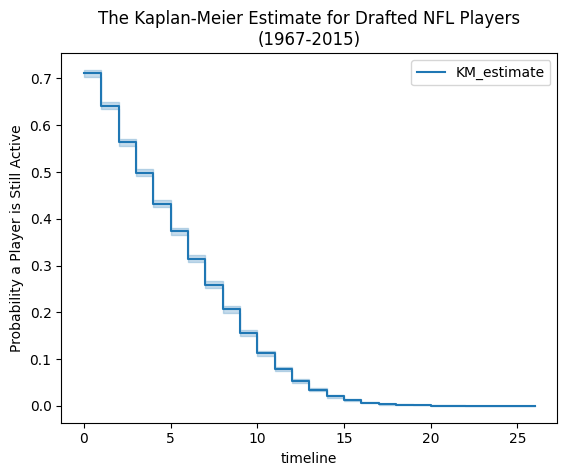

In [15]:
# plot the KM estimate
kmf.plot()
# Add title and y-axis label
plt.title("The Kaplan-Meier Estimate for Drafted NFL Players\n(1967-2015)")
plt.ylabel("Probability a Player is Still Active")

plt.show()